**Librairies**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
import time
from tqdm import tqdm

# TP 3.2 : ABM 2

## 1. Implémentation

### Question 1 :

In [51]:
def model_GCMG(N_s, N_p, P, eps, nb_iter, seed = None):
    
    #Stratégie a avec en ligne l'agent i et en colonne l'état mu
    if seed != None:
        np.random.seed(seed)
    a = np.sign(np.random.random((N_s,P))-0.5)
    
    #Prévisibilité des stratégies fixes à inclure dans le modèle dépendant de l'état mu
    Omega = np.random.normal(scale=np.sqrt(N_p),size=P)
    
    #Performance cumulée des stratégiees des spéculateurs i
    U=np.zeros((N_s, nb_iter))
    
    #A : contribution des autres
    A = np.zeros(nb_iter-1)
    
    #Etat
    mu = np.zeros(nb_iter-1)
    
    for t in range(nb_iter-1):
        
        #Etat
        mu_t = np.random.randint(0,P)
        mu[t] = mu_t
        
        #Participation de l'agent au jeu au temps t
        #n = 0 si U <= 0 (je ne joue pas), n = 1 si U > 0 (je joue)
        n_t = (U[:,t]>0)*1

        # Calcul de A : Contribution des autres
        A[t] = Omega[mu_t] + n_t@a[:,mu_t]
        
        #Performance cumulée au temps t + 1
        U[:,t+1] = U[:,t] - a[:, mu_t]*A[t] - eps
        
    return U, A, mu

In [52]:
#Paramètres
N_s = 500 #Nombres d'agents spéculateurs
N_p = 10 #Nombres d'agents utilisant une stratégie fixe
P = 10 #Nombres d'états de marchés
eps = 0.01 #Fixed reward
nb_iter = 1000 #Nombres d'itérations
seed = 100

In [53]:
#Initialisation
U_model, A_model, mu_model = model_GCMG(N_s, N_p, P, eps, nb_iter, seed)

### Question 2 :

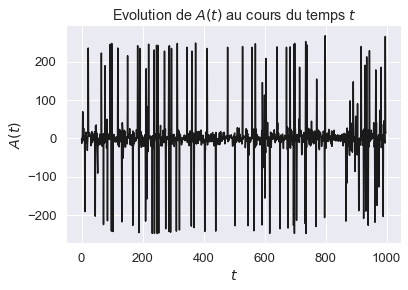

In [54]:
#Plot : Nombre d'états de marché en fonction du temps
fig, ax = plt.subplots()
plt.plot(A_model, color='k')
plt.xlabel('$t$')
plt.ylabel("$A(t)$")
plt.title("Evolution de $A(t)$ au cours du temps $t$")
sns.despine()

Les fluctuations correspondent à $\sigma ^2 = E_t[A^2]$. Nous remarquons que pour certaines valeurs de $t$, A sont très élevés en valeurs absolue ainsi les fluctuations explosent avec un nombre de spéculateurs élevés.

## 2. Rôle des paramètres sur la dynamique

### Paramètres qui produisent des grandes fluctuations de A

In [20]:
#Paramètres
N_s = 500 #Nombres d'agents spéculateurs
N_p = 500 #Nombres d'agents utilisant une stratégie fixe
P = 10 #Nombres d'états de marchés
eps = 0.01 #Fixed reward
nb_iter = 1000 #Nombres d'itérations
seed = 100

**Variation de $N_p$**

In [23]:
#Modèle

#N_p large
N_p_large = 10000
U_N_p_large, A_N_p_large, mu_N_p_large = model_GCMG(N_s, N_p_large, P, eps, nb_iter, seed)

#N_p faible
N_p_small = 10
U_N_p_small, A_N_p_small, mu_N_p_small = model_GCMG(N_s, N_p_small, P, eps, nb_iter, seed)

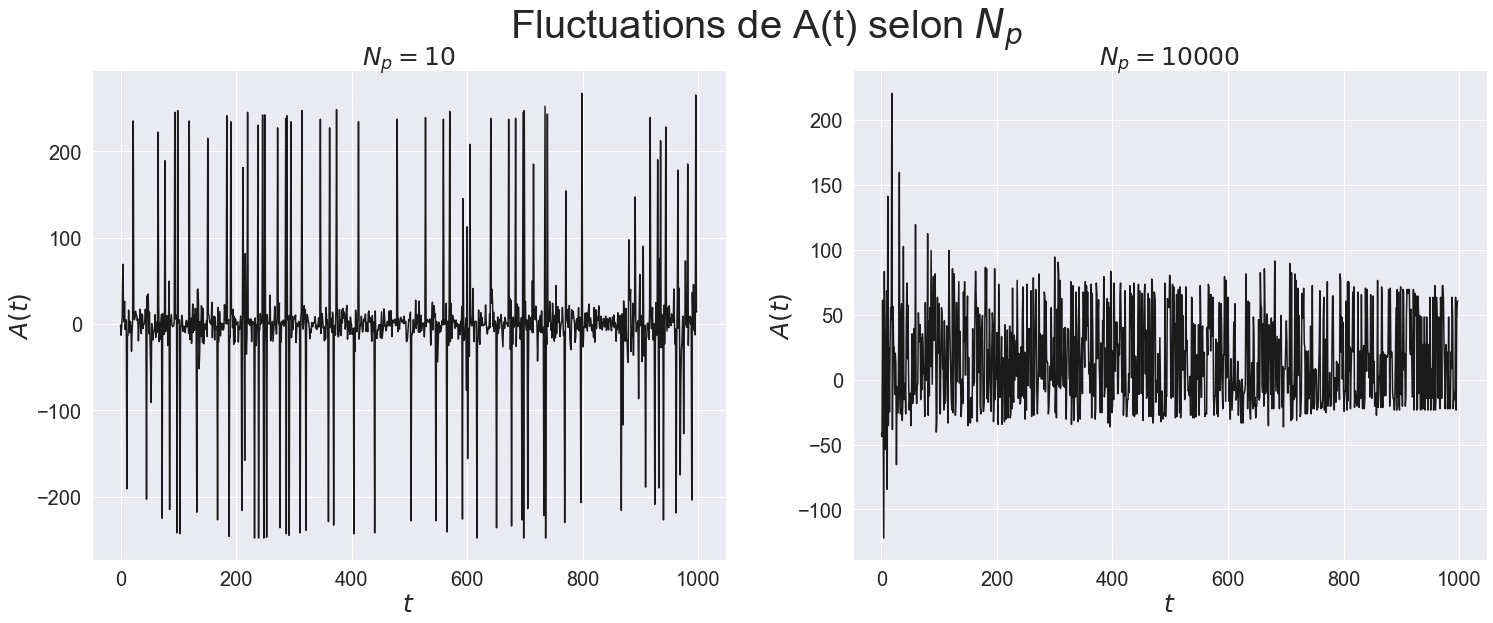

In [25]:
#Plot A(t)
fig = plt.figure(figsize = (25,9))
fig.suptitle("Fluctuations de A(t) selon $N_p$", fontsize=40)

ax1 = fig.add_subplot(121)
ax1.plot(A_N_p_small, color='k')
ax1.tick_params(axis="both", labelsize=20) 
ax1.set_xlabel('$t$', fontsize=25)
#ax1.set_xticklabels(fontsize=14)
ax1.set_ylabel("$A(t)$", fontsize=25)
ax1.set_title("$N_p = 10$", fontsize=25)

ax2 = fig.add_subplot(122)
ax2.plot(A_N_p_large, color='k')
ax2.tick_params(axis="both", labelsize=20) 
ax2.set_xlabel('$t$', fontsize=25)
ax2.set_ylabel("$A(t)$", fontsize=25)
ax2.set_title("$N_p = 10000$", fontsize=25)

sns.despine()

On constate qu'un faible nombre de producteurs $N_p$ par rapport à $N_s$ va déstabiliser le marché. En effet, des périodes stables avec une forte prévisibilité vont pousser les spéculateurs à absorber la prévisibilité. A un certain moment, ils seront trop nombreux ce qui va engendrer des pics de volatilité ($A$ très élevé pour certains $t$ sur le premier graphique). En revanche un nombre très élevé de producteurs $N_p$ par rapport à $N_s$ créé de la prévisibilité qui profite aux spéculateurs. La volatilité varie mais sans gros pics car la contribution des producteurs sur la prévisibilité reste importante (deuxième graphique).

**Variation de $N_s$**

In [13]:
#Modèle

#N_s large
N_s_large = 10000
U_N_s_large, A_N_s_large, mu_N_s_large = model_GCMG(N_s_large, N_p, P, eps, nb_iter, seed)

#N_s faible
N_s_small = 10
U_N_s_small, A_N_s_small, mu_N_s_small = model_GCMG(N_s_small, N_p, P, eps, nb_iter, seed)

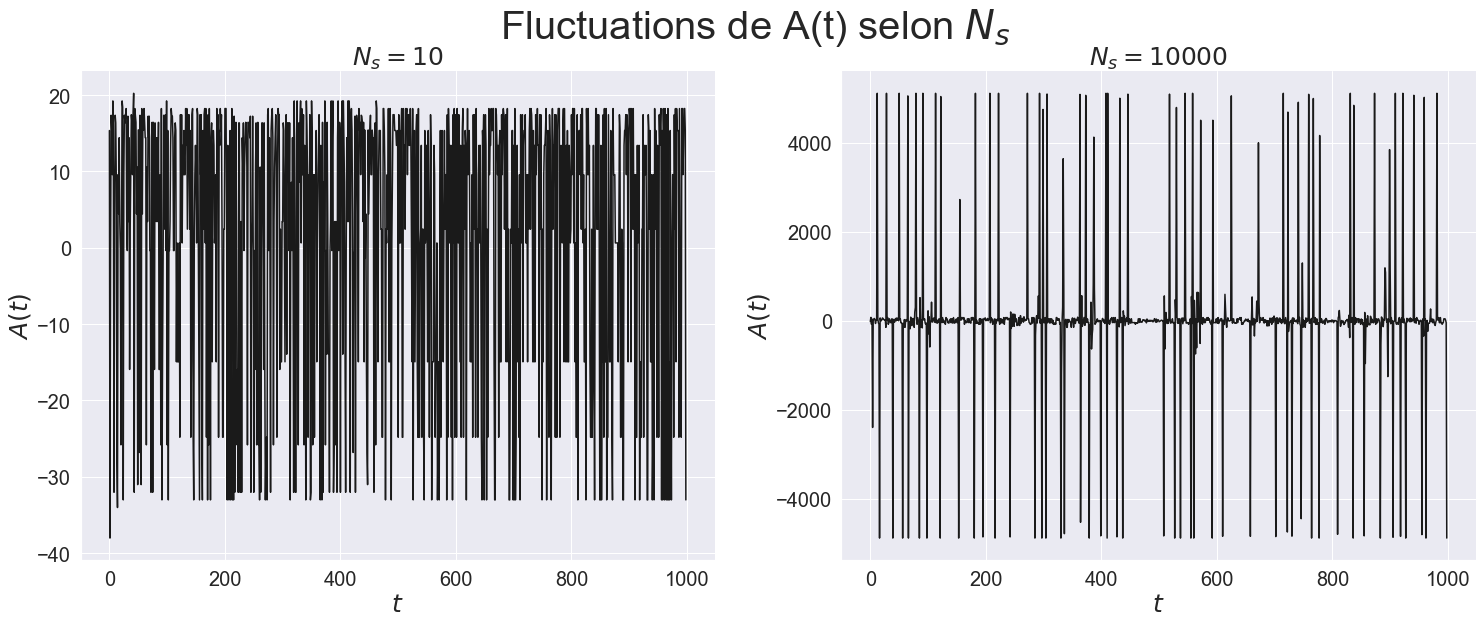

In [14]:
#Plot A(t)
fig = plt.figure(figsize = (25,9))
fig.suptitle("Fluctuations de A(t) selon $N_s$", fontsize=40)

ax1 = fig.add_subplot(121)
ax1.plot(A_N_s_small, color='k')
ax1.tick_params(axis="both", labelsize=20) 
ax1.set_xlabel('$t$', fontsize=25)
#ax1.set_xticklabels(fontsize=14)
ax1.set_ylabel("$A(t)$", fontsize=25)
ax1.set_title("$N_s = 10$", fontsize=25)

ax2 = fig.add_subplot(122)
ax2.plot(A_N_s_large, color='k')
ax2.tick_params(axis="both", labelsize=20) 
ax2.set_xlabel('$t$', fontsize=25)
ax2.set_ylabel("$A(t)$", fontsize=25)
ax2.set_title("$N_s = 10000$", fontsize=25)

sns.despine()

On remarque que plus le nombre d'agents spéculateurs ($N_s$) augmente, plus les fluctuations risquent d'exploser. En effet, plus il y a d'agents, plus ils apprennent et la prévisibilité diminue. Cependant, il restera du bruit et les agents spéculateurs vont apprendre de ce dernier et l'amplifier. C'est un phénomène de boucle de rétroaction. 

**Variation de $P$**

In [15]:
#Modèle

#P large
P_large = 1000
U_P_large, A_P_large, mu_P_large = model_GCMG(N_s, N_p, P_large, eps, nb_iter, seed)

#P faible
P_small = 10
U_P_small, A_P_small, mu_P_small = model_GCMG(N_s, N_p, P_small, eps, nb_iter, seed)

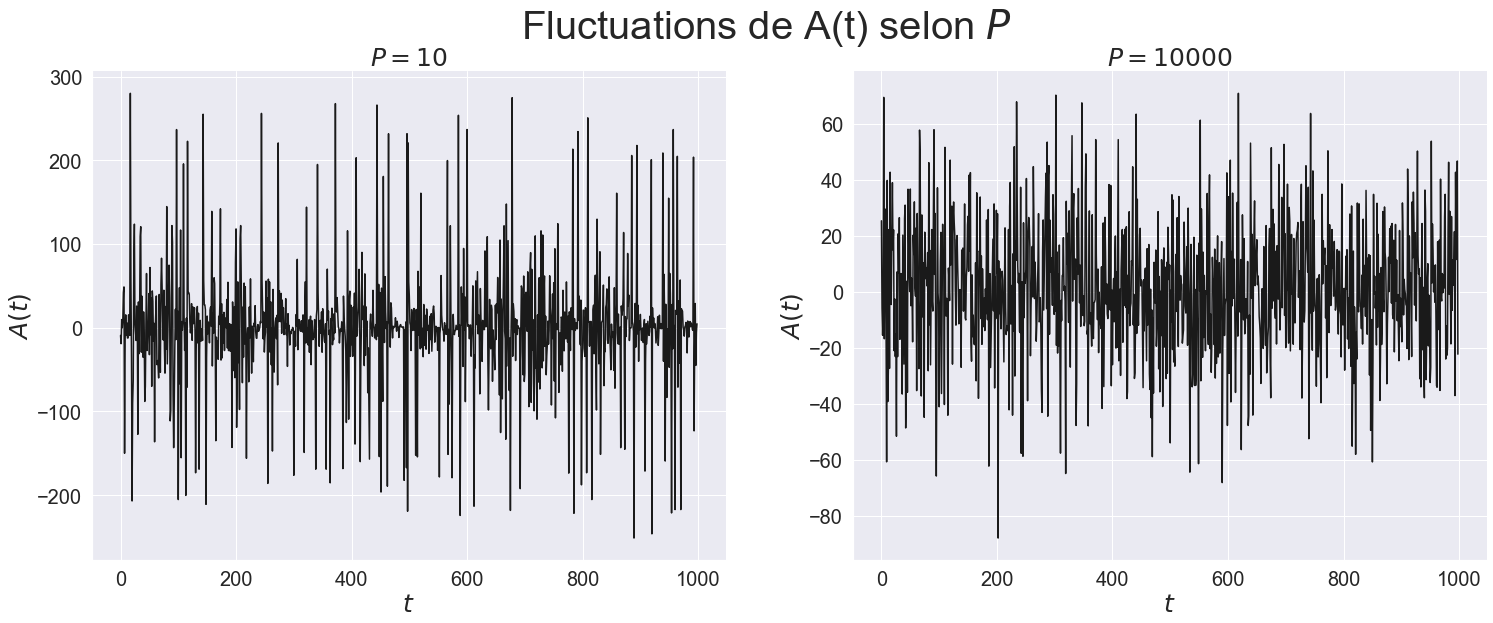

In [16]:
#Plot A(t)
fig = plt.figure(figsize = (25,9))
fig.suptitle("Fluctuations de A(t) selon $P$", fontsize=40)

ax1 = fig.add_subplot(121)
ax1.plot(A_P_small, color='k')
ax1.tick_params(axis="both", labelsize=20) 
ax1.set_xlabel('$t$', fontsize=25)
#ax1.set_xticklabels(fontsize=14)
ax1.set_ylabel("$A(t)$", fontsize=25)
ax1.set_title("$P = 10$", fontsize=25)

ax2 = fig.add_subplot(122)
ax2.plot(A_P_large, color='k')
ax2.tick_params(axis="both", labelsize=20) 
ax2.set_xlabel('$t$', fontsize=25)
ax2.set_ylabel("$A(t)$", fontsize=25)
ax2.set_title("$P = 10000$", fontsize=25)

sns.despine()

Nous avons $N_s = 500$ et donc $P/N_s = 0.02$ dans le cas $P$ faible et $P/N_s = 2$ dans le cas $P$ élevé. Nous remarquons que plus le rapport est faible ($P$ faible par rapport à $N_s$), plus les fluctuations de $A(t)$ augmentent. En effet, les stratégies des joueurs vont être moins aléatoires car il y a peu d'états de marchés, ce qui va diminuer la prévisibilité et donc à un certain niveau augmenter les fluctuations lié aux bruits.

**Variation de $\epsilon$**

In [17]:
#Paramètres
N_s = 500 #Nombres d'agents spéculateurs
N_p = 500 #Nombres d'agents utilisant une stratégie fixe
P = 10 #Nombres d'états de marchés
eps = 0.01 #Fixed reward
nb_iter = 1000 #Nombres d'itérations

In [18]:
#Modèle

#epsilon large
eps_large = 1
U_P_large, A_eps_large, mu_eps_large = model_GCMG(N_s, N_p, P, eps_large, nb_iter, seed)

#epsilon faible
eps_small = 0.001
U_P_small, A_esp_small, mu_esp_small = model_GCMG(N_s, N_p, P, eps_small, nb_iter, seed)


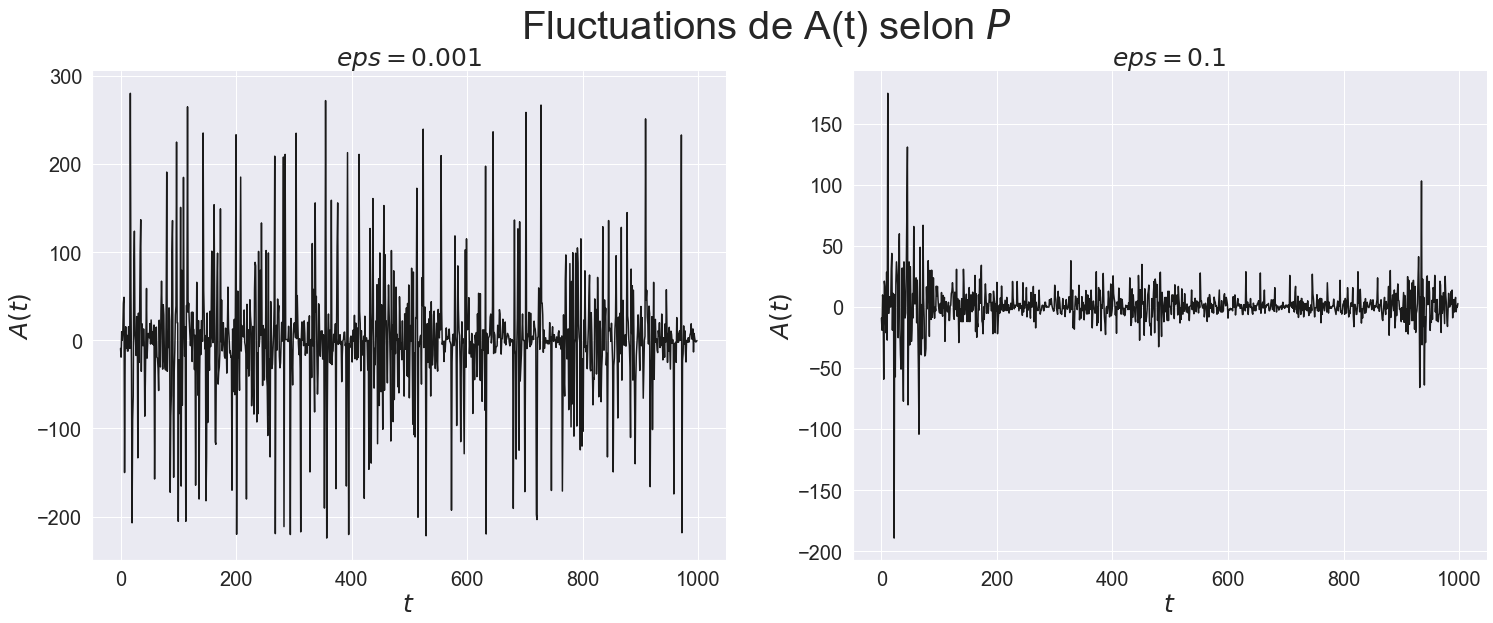

In [19]:
#Plot A(t)
fig = plt.figure(figsize = (25,9))
fig.suptitle("Fluctuations de A(t) selon $P$", fontsize=40)

ax1 = fig.add_subplot(121)
ax1.plot(A_esp_small, color='k')
ax1.tick_params(axis="both", labelsize=20) 
ax1.set_xlabel('$t$', fontsize=25)
#ax1.set_xticklabels(fontsize=14)
ax1.set_ylabel("$A(t)$", fontsize=25)
ax1.set_title("$eps = 0.001$", fontsize=25)

ax2 = fig.add_subplot(122)
ax2.plot(A_eps_large, color='k')
ax2.tick_params(axis="both", labelsize=20) 
ax2.set_xlabel('$t$', fontsize=25)
ax2.set_ylabel("$A(t)$", fontsize=25)
ax2.set_title("$eps = 0.1$", fontsize=25)

sns.despine()

Le $\epsilon$ joue un rôle très important pour les stratégies des spéculateurs. En effet, la stratégie de l’agent est active quand $U>0$ et désactive quand $U<0$ ce qui crée un temps de décalage entre les signaux d'achats et ventes qui risque d'impliquer une perte. Ainsi, l'ajout de $\epsilon$ dans $U$ permet de prendre en compte ce temps de décalage et assurer un gain lorsque l'agent entre et sort de la stratégie. On peut également voir ce paramètre comme étant un coût de transaction. Un $\epsilon$ faible va déstabiliser le marché car les spéculateurs vont plus souvent activer leurs stratégies. La prévisibilité va alors diminuer, induisant un rapport prévisibilité/bruit plus faible. Les agents vont amplifier le bruit et la volatilité. En revanche, si le $\epsilon$ est élevé, moins de stratégies vont être mis en place ce qui permet de garder une certaine prévisibilité et donc d'avoir un marché plus stable, moins volatile.

## 3. Dynamique de la prévisibilité

### Question 1 :

In [51]:
#Paramètres
N_s = 1000 #Nombres d'agents spéculateurs
N_p = 20 #Nombres d'agents utilisant une stratégie fixe
P = 20 #Nombres d'états de marchés
eps = 0.01 #Fixed reward
nb_iter = 10000 #Nombres d'itérations
seed = 100

In [52]:
#Initialisation
U_model, A_model, mu_model = model_GCMG(N_s, N_p, P, eps, nb_iter, seed)

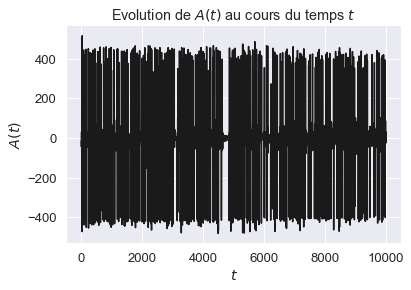

In [53]:
#Plot : Nombre d'états de marché en fonction du temps
fig, ax = plt.subplots()
plt.plot(A_model, color='k')
plt.xlabel('$t$')
plt.ylabel("$A(t)$")
plt.title("Evolution de $A(t)$ au cours du temps $t$")
sns.despine()

In [45]:
nb_tranche = int(nb_iter/(10*P))
size_tranche = 10*P
tra = np.linspace(10*P, nb_iter, int(nb_iter/(10*P)))
tra = list(map(int, tra.tolist()))
sigma_2 = np.zeros(nb_tranche)
H = np.zeros(nb_tranche)
start = 0
for i in range(nb_tranche):
    stop = tra[i]
    A_tra = A_model[start:stop]
    sigma_2[i] = np.mean(A_tra ** 2)/N_s
    mu_tra = mu_model[start:stop]
    esp_cond_A = []
    for etat in np.unique(mu_model):
        index = np.where(mu_tra == etat)
        esp_cond_A.append((A_tra[index].sum() / len(index))**2)
        
        #sum_espAcond = sum_espAcond + A_tra[index].mean() ** 2
    H[i] = sum(esp_cond_A) / (P * N_s)
    start = stop

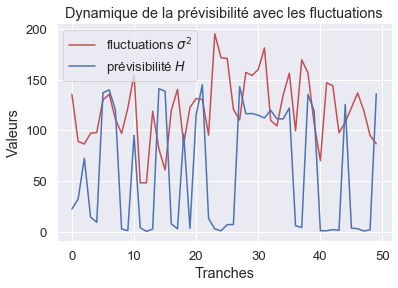

In [46]:
#Plot : Nombre d'états de marché en fonction du temps
fig, ax = plt.subplots()
plt.plot(sigma_2, color='r', label = 'fluctuations $\sigma ^2$')
plt.plot(H, color='b', label = 'prévisibilité $H$')
plt.legend()
plt.xlabel('Tranches')
plt.ylabel("Valeurs")
plt.title("Dynamique de la prévisibilité avec les fluctuations")
sns.despine()

Les fluctuations explosent, en général, lorsque la prévisibilité est proche de $0$. Si cette dernière est nulle, les spéculateurs ont utilisé toutes la prévisibilité provenant des producteurs. A partir d'un certains seuil, ils accentuent le bruit présent dans le marché ce qui crée une forte volatilité.

### Question 2 :

In [75]:
def model_GCMG_2(N_s, N_p, P, eps, nb_iter, Time_eq, seed = None):
    
    #Stratégie a avec en ligne l'agent i et en colonne l'état mu
    if seed != None:
        np.random.seed(seed)
    a = np.sign(np.random.random((N_s,P))-0.5)
    
    #Prévisibilité des stratégies fixes à inclure dans le modèle dépendant de l'état mu
    Omega = np.random.normal(scale=np.sqrt(N_p),size=P)
    
    #Performance cumulée des stratégiees des spéculateurs i
    U=np.zeros(N_s)
    
    #A : contribution des autres
    #A = np.zeros(nb_iter + Time_eq)
    
    #Time_eq : temps jusqu'à l'équilibre
    Time_eq = np.int(Time_eq * P / eps)
    
    #Nb_itérations sur lesquelles on va faire nos moyennes
    nb_iter = np.int(nb_iter * P)
    
    somme_A = 0
    A_mu = np.zeros(P)
    nb_mu = np.zeros(P)
    N_active = 0
    nb_iter_for_N_active = 0
    
    for t in range(nb_iter-1 + Time_eq):
        
        if t == Time_eq - 1:
            somme_A = 0
            A_mu = np.zeros(P)
            nb_mu = np.zeros(P)
            N_active = 0
            nb_iter_for_N_active = 0
            
        #Etat
        mu_t=np.random.randint(0,P)

        #Participation de l'agent au jeu au temps t
        #n = 0 si U <= 0 (je ne joue pas), n = 1 si U > 0 (je joue)
        n_t = (U>0)*1
    
        # Calcul de A : Contribution des autres
        A = Omega[mu_t] + n_t@a[:,mu_t]
        
        #Performance cumulée au temps t + 1
        U = U - a[:, mu_t]*A - eps
        
        somme_A += A * A
        A_mu[mu_t] += A
        nb_mu[mu_t] += 1
        
        N_active = N_active + (sum(n_t) + N_p)
        nb_iter_for_N_active = nb_iter_for_N_active + 1
    
    sigma = somme_A / (N_s * nb_iter)
    A_mu = A_mu / (nb_mu + (nb_mu == 0))
    H=np.sum(A_mu*A_mu)/N_s
    N_active = N_active/nb_iter_for_N_active
    
    return sigma, H, N_active

In [76]:
#Paramètres
N_s = 1000 #Nombres d'agents spéculateurs
N_p = 500 #Nombres d'agents utilisant une stratégie fixe
P = 20 #Nombres d'états de marchés
eps = 0.01 #Fixed reward
nb_iter = 200 #Nombres d'itérations
Time_eq = 200

In [ ]:
N_s = np.linspace(30,1000,15).astype('int')
n_s = (N_s / P).astype('int')
rea = 10

sigma = np.zeros((len(n_s),rea))
H = np.zeros((len(n_s),rea))
N_active = np.zeros((len(n_s),rea))

for i in tqdm(range(len(n_s))):
    for j in range(rea):
        sigma[i,j], H[i,j], N_active[i,j] = model_GCMG_2(n_s[i], N_p, P, eps, nb_iter, Time_eq)
        sigma[i,j] = sigma[i,j]/P
        H[i,j] = H[i,j]/P

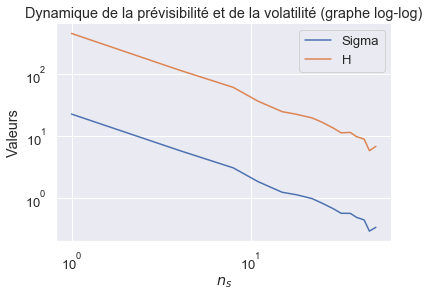

In [85]:
#Plot
sigma_m = np.mean(sigma,axis = 1)
H_m = np.mean(H,axis = 1)
plt.plot(n_s,sigma_m, label = "Sigma")
plt.plot(n_s,H_m, label = "H")
plt.xlabel('$n_s$')
plt.ylabel("Valeurs")
plt.title("Dynamique de la prévisibilité et de la volatilité (graphe log-log)")
plt.yscale('log')
plt.xscale('log')
plt.legend()
sns.despine()

D'après le graphique, plus le nombre de spéculateurs augmentent, plus la prévisibilité tend vers $0$. En effet, les spéculateurs vont absorber toutes la prévisibilité créée par les producteurs. La volatilité va également diminuer mais elle n'explose pas dans ce cas.

Avec $\epsilon$ qui est supérieur à $0$, plus $N_s$ est grand, plus la prévisibilité diminue et tend vers $0$. Cependant, elle n'atteint jamais pile $0$. En effet, l'$\epsilon$ va limiter le nombre de spéculateur car il assure que le retard pris par les signaux n'engrangent pas des pertes. Un nombre de spéculateur actif moins élevé permet de laisser de la prévisibilité dans le marché.

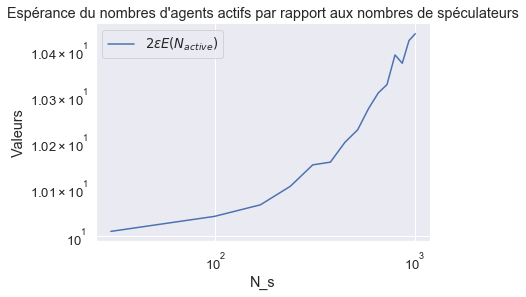

In [84]:
N_active_m = np.mean(N_active, axis = 1)
val = 2*eps*N_active_m
plt.plot(N_s,val, label = "$2 \epsilon E(N_{active})$")
plt.xlabel('N_s')
plt.ylabel("Valeurs")
plt.title("Espérance du nombres d'agents actifs par rapport aux nombres de spéculateurs")
plt.yscale('log')
plt.xscale('log')
plt.legend()
sns.despine()

Le nombre d'agents actifs augmente moins vite que le nombre de spéculateurs présent sur le marché. En effet, plus il y a d'agent, moins il y a de prévisibilité et le paramètre $\epsilon$ vient limiter la fonction d'utilité des agents.